##                              SALES FORCASTING USING LINEAR REGRESSION
                                                                                      -B.Subramanian
                                                                                       21MCA22

### Introduction:

Objective: To predict the future sales by the use of historical data.

Goal: My goal to find corelation between two rows MRP and OutletSales and find the relation between them, the how the MRP affects the overall sales and to find the How much people spend their money for buying so product.

## About Linear regression:

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.
This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

References:
Importance of sales forecasting:
https://www.chargebee.com/blog/importance-of-sales-forecasting/#:~:text=Sales%20forecasting%20allows%20companies%20to,and%20manage%20its%20cash%20flow.&text=Sales%20forecasting%20also%20helps%20businesses,term%20and%20long%2Dterm%20performance.

Key takeaways:
https://www.anaplan.com/blog/sales-forecasting-guide/#:~:text=What%20is%20sales%20forecasting%3F,month%2C%20quarter%2C%20or%20year.

Data collection:
https://www.kaggle.com/




In [123]:
#importing required libraries

import pandas as pd # for data frames
import numpy as np # for array reshaping

import seaborn as sn # for plots
import matplotlib.pyplot as plt # for plots
from sklearn.model_selection import train_test_split # to do test & train data split
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn import metrics # for the error metrics
from sklearn.metrics import r2_score # for calculation the r squared value
import statsmodels.api as sm # Linear regression with statsmodels
from bokeh.transform import cumsum
%matplotlib inline

## Data preprocessing

In [128]:
# Creating data frame and ingesting the data from .csv file into the data frame
df = pd.read_csv(r'C:\Users\subra\Documents\4th semester\Mca 5964 Project\project process\sorted.csv')
# df=pd.read_csv(r'C:\Users\subra\Documents\4th semester\Mca 5964 Project\Backup\train.csv')

In [129]:
df.shape

(4650, 4)

In [130]:
# Printing data types of each column
datatypes = df.dtypes
datatypes

ProductID        object
OutletSales     float64
MRP             float64
LocationType     object
dtype: object

In [131]:
#Finding the Null values in the data set and summing up the data 
df.isnull().sum()

ProductID       0
OutletSales     0
MRP             0
LocationType    0
dtype: int64

In [132]:
# Descrebing the values by fing the mean and count in the given data cells
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OutletSales,4650.0,2272.037489,1497.964740,69.2432,1125.2020,1939.8083,3111.61630,10256.6490
MRP,4650.0,141.716328,62.420534,31.4900,94.4094,142.9799,186.61415,266.8884


## Data Visualization

In [133]:
#Displaying the data cells For a sample
df

,ProductID,OutletSales,MRP,LocationType
0,FDA15,3735.1380,249.8092,Tier 1
1,FDN15,2097.2700,141.6180,Tier 1
2,FDY07,1516.0266,45.5402,Tier 1
3,FDA03,2187.1530,144.1102,Tier 1
4,FDX32,1589.2646,145.4786,Tier 1
...,...,...,...,...
4645,FDR26,2479.4392,178.3028,Tier 3
4646,FDH24,1571.2880,157.5288,Tier 3
4647,NCJ19,858.8820,58.7588,Tier 3
4648,FDF22,2778.3834,214.5218,Tier 3


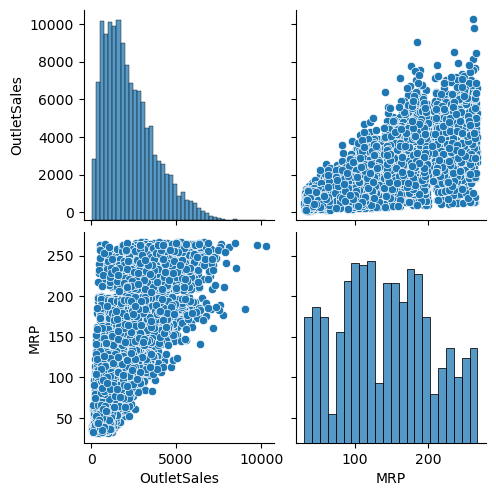

In [134]:
# Seaborn pairplot is used for visualizing the data of each rows with scatter and bar charts
sn.pairplot(df)

array([[<AxesSubplot: title={'center': 'OutletSales'}>,
        <AxesSubplot: title={'center': 'MRP'}>]], dtype=object)

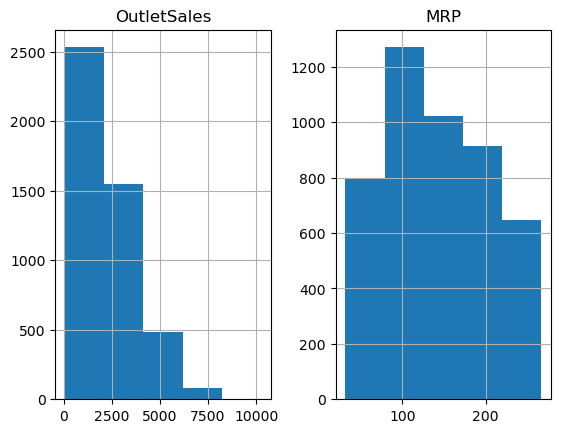

In [135]:
#Displaying the histogram charts for finding the relation between MRP and OutletSales 
hist = df.hist(bins=5)
hist

<AxesSubplot: >

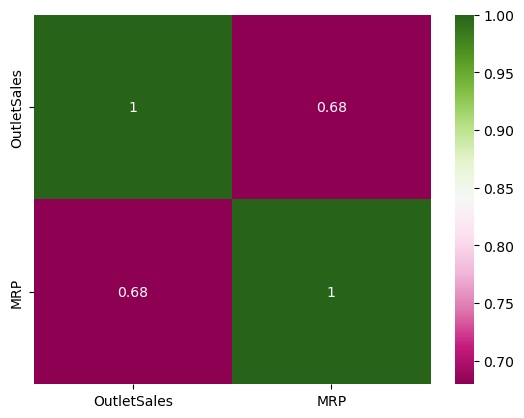

In [136]:
# Checking for correlation between MRP and outlet sales

# Creating a correlation matrix from the data frame
corrMatrix = df.corr()

# Plotting using heatmap
sn.heatmap(corrMatrix, annot = True, cmap= 'PiYG')

In [137]:
# Correlation using kendall method
df.corr(method ='kendall')


,OutletSales,MRP
OutletSales,1.00000,0.51975
MRP,0.51975,1.00000


In [138]:
# Before splitting we will be building two arrays x & y
# x array contains the data that we use to make predictions (MRP)
# y array contains the data that we will be predicting (Sales)
# In nutshell, y is dependent onx

x = df['MRP']
y = df['OutletSales']

##                                            Building the model


## Splitting the dataset:

First step is to split the given dataset into training dataset and test dataset. While training dataset will
be used to build the model,test datasetwill be leveraged to validate the model. Since the estimated dataset
has the actual output,we can validate with predicted outcome and understand error metrics such as accuracy, precision and so on.


In [139]:
# Now let us split the datasets x & y into train & test respectively. 
# 0.2 represents 20% of data will be leveraged for training & 80% of data will be used for test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [140]:
# Since we have single feature we need to convert into a 2-D array with reshape (since model training requires 2-D array)
# This step is NOT required if you have more than one features for prediction

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train

array([[141.7154],
       [145.276 ],
       [116.9492],
       ...,
       [ 89.3172],
       [172.0422],
       [244.4486]])

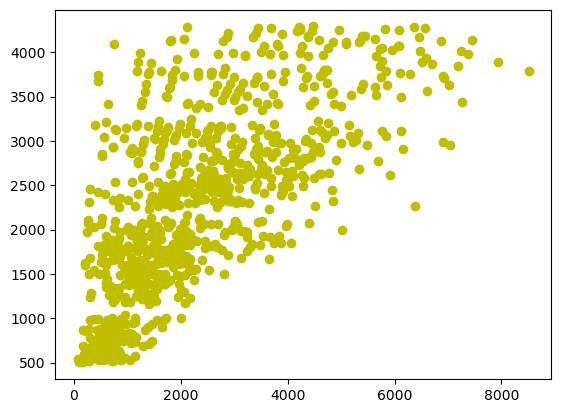

In [141]:
# predicing the responses (y, the outlet sales) based on the predictor (x, Mrp)

predictions = model.predict(x_test)

# We will be comparing with the predicted value with actual response (which was stored in y_test)
plt.scatter(y_test, predictions, color='y')


In [142]:
# Linear Regression Model
model = LinearRegression()

# Training the model with the training data x (MRP) & y (Outletsales)
response= model.fit(x_train, y_train)

# Getting the coefficient
coeff = response.coef_

# Getting the intercept
intercept = response.intercept_

print ("The coefficient is: %d and the intercept is: %d"  %(coeff, intercept))

The coefficient is: 15 and the intercept is: -4


In [143]:
#Finding error metric
r2 = r2_score(y_test,predictions)

print("R-squared: ", r2)

R-squared:  0.4749417910467556


Thus , the accuracy of the applied model got 48 percentenge out of 100 percentage , For the good model the accuracy ranges upto 
ranges from 70 to 80 percentage , So i need perform Multiple regression model by using the groupby function in the pandas dataset.


In [144]:
print(df.groupby(["LocationType","OutletSales"]).first())

                         ProductID       MRP
LocationType OutletSales                    
Tier 1       101.8674        NCO06   32.4558
             111.8544        FDF09   37.4848
             162.4552        DRK49   41.5138
             173.1080        NCL05   44.6770
             183.0950        NCA06   37.9190
...                            ...       ...
Tier 3       7322.4684       FDB56  186.8556
             7452.9652       FDY55  256.4988
             7843.1240       DRK23  254.8040
             9069.5276       FDA21  184.4924
             10256.6490      FDF39  261.2910

[3512 rows x 2 columns]
